In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('data.csv', delimiter=',', encoding='ISO-8859-1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


Information of the columns in a data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75106 entries, 0 to 75105
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    75106 non-null  object 
 1   StockCode    75106 non-null  object 
 2   Description  74903 non-null  object 
 3   Quantity     75105 non-null  float64
 4   InvoiceDate  75105 non-null  object 
 5   UnitPrice    75105 non-null  float64
 6   CustomerID   46828 non-null  float64
 7   Country      75105 non-null  object 
dtypes: float64(3), object(5)
memory usage: 4.6+ MB


In [4]:
# data.describe().T
data.describe()

,Quantity,UnitPrice,CustomerID
count,75105.000000,75105.000000,46828.000000
mean,8.438147,5.639838,15347.426283
std,387.156865,136.348094,1762.929568
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,13959.000000
50%,2.000000,2.510000,15311.000000
75%,8.000000,4.210000,16931.000000
max,74215.000000,16888.020000,18283.000000


checking for null values

In [5]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,203
Quantity,1
InvoiceDate,1
UnitPrice,1
CustomerID,28278
Country,1


In [6]:
data.shape

(75106, 8)

Delete all the missing records

In [7]:
data.dropna(inplace=True)

In [8]:
print(f'total rows after missing value removal{data.shape}')

total rows after missing value removal(46828, 8)


Handling negative values

In [9]:
data = data[data['Quantity'] > 0]
data[data['UnitPrice']<0].shape[0]

0

In [10]:
data.drop(data[data['Quantity'] < 0].index, inplace=True)

/tmp/ipython-input-10-2690851687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data['Quantity'] < 0].index, inplace=True)


In [11]:
data.shape

(45507, 8)

Calculation of total amount

In [12]:
data['Sales'] = data['Quantity'] * data['UnitPrice']
new_data = data.groupby('CustomerID')['Sales'].sum().reset_index()
new_data

/tmp/ipython-input-12-1758066889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sales'] = data['Quantity'] * data['UnitPrice']


,CustomerID,Sales
0,12346.0,77183.60
1,12347.0,1187.18
2,12348.0,1120.24
3,12356.0,2271.62
4,12359.0,547.50
...,...,...
1266,18245.0,365.73
1267,18259.0,376.30
1268,18260.0,787.77
1269,18269.0,168.60


calculating the number of transactions of each customer

In [13]:
num_trans = data.groupby('CustomerID')['InvoiceNo'].count().reset_index()
num_trans

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,60
2,12348.0,23
3,12356.0,36
4,12359.0,16
...,...,...
1266,18245.0,27
1267,18259.0,7
1268,18260.0,37
1269,18269.0,7


In [14]:
#Converting 'InvoiceDate' to DateTime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
#Calculating 'Last Transaction' Days:
data['Last Transaction'] = (data['InvoiceDate'].max() - data['InvoiceDate']).dt.days
#Grouping by 'CustomerID' and 'Country' and Calculating Maximum 'Last Transaction'
lt = data.groupby(['CustomerID', 'Country'])['Last Transaction'].max().reset_index()
#Merging with Number of Transactions
merge_table = pd.merge(lt, num_trans, how='inner', on='CustomerID')
new_df = pd.merge(merge_table, new_data, how='inner', on='CustomerID')
print(lt)
print(new_df)

      CustomerID         Country  Last Transaction
0        12346.0  United Kingdom                10
1        12347.0         Iceland                51
2        12348.0         Finland                42
3        12356.0        Portugal                10
4        12359.0          Cyprus                16
...          ...             ...               ...
1267     18245.0  United Kingdom                39
1268     18259.0  United Kingdom                51
1269     18260.0  United Kingdom                42
1270     18269.0  United Kingdom                51
1271     18283.0  United Kingdom                21

[1272 rows x 3 columns]
      CustomerID         Country  Last Transaction  InvoiceNo     Sales
0        12346.0  United Kingdom                10          1  77183.60
1        12347.0         Iceland                51         60   1187.18
2        12348.0         Finland                42         23   1120.24
3        12356.0        Portugal                10         36   2271.62
4  

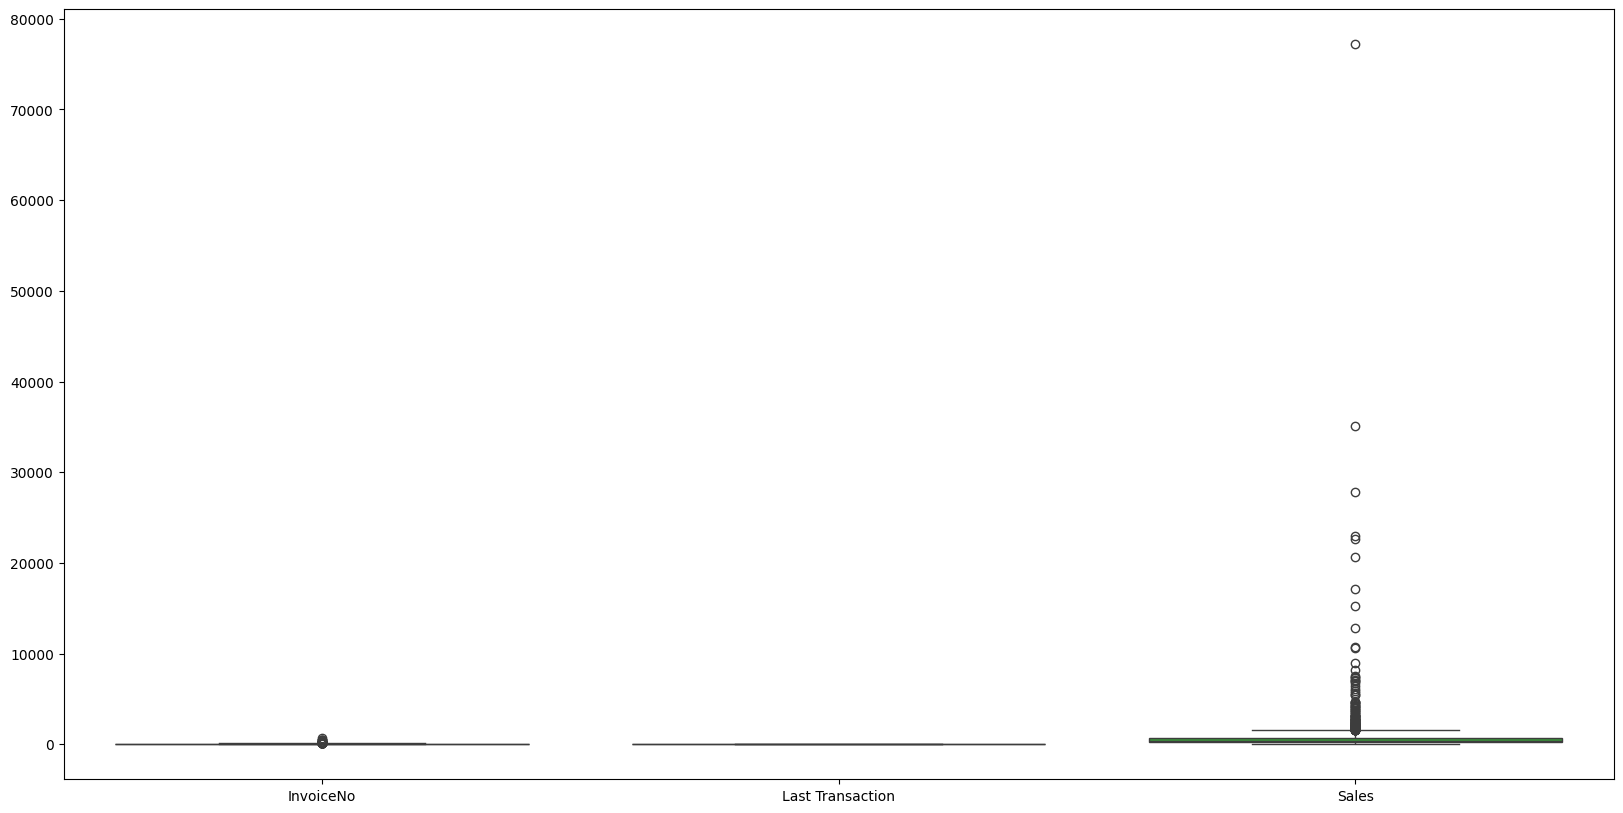

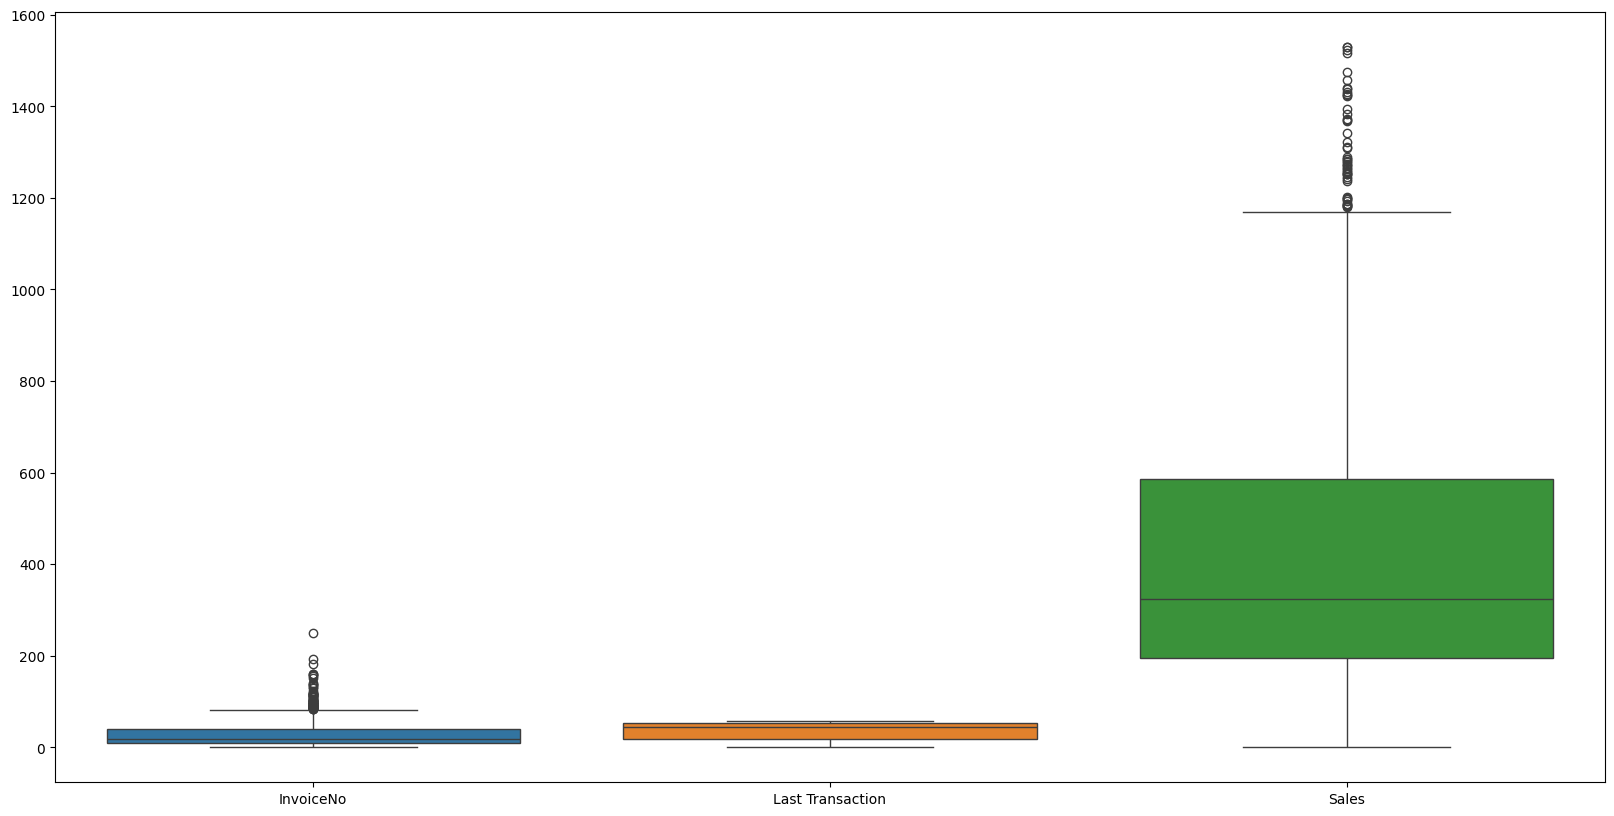

In [15]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=new_df[['InvoiceNo', 'Last Transaction', 'Sales']])
plt.show()

IQR = new_df['Sales'].quantile(0.75) - new_df['Sales'].quantile(0.25)
lower_limit = new_df['Sales'].quantile(0.25) - 1.5 * IQR
upper_limit = new_df['Sales'].quantile(0.75) + 1.5 * IQR
new_df_iqr = new_df[(new_df['Sales'] < upper_limit) & (new_df['Sales'] > lower_limit)]

plt.figure(figsize=(20, 10))
sns.boxplot(data=new_df_iqr[['InvoiceNo', 'Last Transaction', 'Sales']])
plt.show()

new_df_iqr.reset_index(drop=True, inplace=True)

In [16]:
from sklearn.preprocessing import MinMaxScaler
new2_df= new_df_iqr[['Last Transaction','InvoiceNo','Sales']]
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(new2_df)
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns = ['Last Transaction','InvoiceNo','Sales']
scaled_df['Country'] = new_df_iqr['Country']
scaled_df


,Last Transaction,InvoiceNo,Sales,Country
0,0.879310,0.236948,0.776419,Iceland
1,0.724138,0.088353,0.732609,Finland
2,0.275862,0.060241,0.357767,Cyprus
3,0.672414,0.168675,0.654910,Switzerland
4,0.620690,0.269076,0.818764,Belgium
...,...,...,...,...
1142,0.672414,0.104418,0.238804,United Kingdom
1143,0.879310,0.024096,0.245721,United Kingdom
1144,0.724138,0.144578,0.515017,United Kingdom
1145,0.879310,0.024096,0.109788,United Kingdom


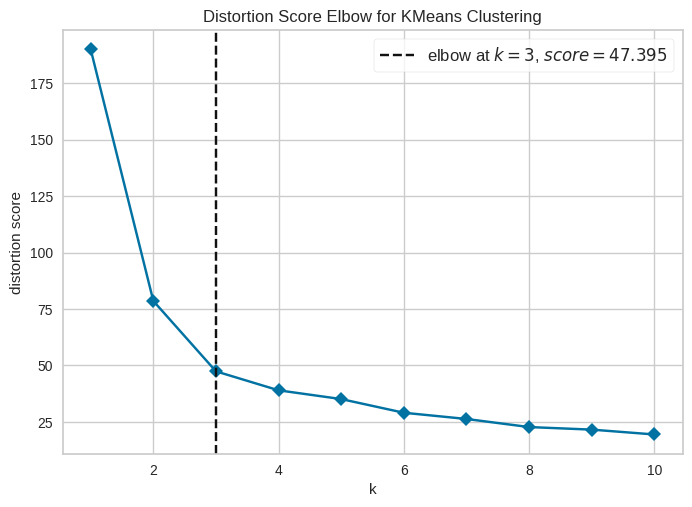

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
df_k=scaled_df.drop(columns=['Country'],axis=1)
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,11), timings= False)
visualizer.fit(df_k)        # Fit data to visualizer
visualizer.show()

In [18]:
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(df_k, model.labels_, metric='euclidean')
print(score)

from sklearn.cluster import AgglomerativeClustering
hierarchial = AgglomerativeClustering(n_clusters=3)
y_predicted_hierarchial = hierarchial.fit_predict(df_k)
df_k['clusters_hierarchial']= y_predicted_hierarchial
df_k.head(30)

0.32995638967817636


,Last Transaction,InvoiceNo,Sales,clusters_hierarchial
0,0.879310,0.236948,0.776419,0
1,0.724138,0.088353,0.732609,0
2,0.275862,0.060241,0.357767,1
3,0.672414,0.168675,0.654910,0
4,0.620690,0.269076,0.818764,0
5,0.879310,0.036145,0.262476,2
6,0.189655,0.072289,0.281717,1
7,0.293103,0.084337,0.417978,1
8,0.948276,0.120482,0.444432,0
9,0.137931,0.040161,0.147093,1


In [19]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_k)
df_k['clusters'] = y_predicted


Calculating the silhouette score

In [20]:
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(df_k, km.labels_, metric='euclidean')
print(score)

0.8555404364178463


Hierarchical clustering

In [21]:
from sklearn.cluster import AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters=2)
y_predicted_hierarchial = hierarchial.fit_predict(df_k)
df_k['clusters_hierarchical'] = y_predicted_hierarchial
df_k

,Last Transaction,InvoiceNo,Sales,clusters_hierarchial,clusters,clusters_hierarchical
0,0.879310,0.236948,0.776419,0,0,0
1,0.724138,0.088353,0.732609,0,0,0
2,0.275862,0.060241,0.357767,1,2,1
3,0.672414,0.168675,0.654910,0,0,0
4,0.620690,0.269076,0.818764,0,0,0
...,...,...,...,...,...,...
1142,0.672414,0.104418,0.238804,2,1,2
1143,0.879310,0.024096,0.245721,2,1,2
1144,0.724138,0.144578,0.515017,0,0,0
1145,0.879310,0.024096,0.109788,2,1,2


calculating silhouette score for agglomerative clustering

In [22]:
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(df_k, km.labels_, metric='euclidean')
print(score)

0.8761498436857289


Implementing DBSCAN

In [23]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=4)
y_predicted_dbscan = dbscan.fit_predict(df_k)
df_k['clusters_dbscan'] = y_predicted_dbscan
df_k

,Last Transaction,InvoiceNo,Sales,clusters_hierarchial,clusters,clusters_hierarchical,clusters_dbscan
0,0.879310,0.236948,0.776419,0,0,0,0
1,0.724138,0.088353,0.732609,0,0,0,0
2,0.275862,0.060241,0.357767,1,2,1,1
3,0.672414,0.168675,0.654910,0,0,0,0
4,0.620690,0.269076,0.818764,0,0,0,0
...,...,...,...,...,...,...,...
1142,0.672414,0.104418,0.238804,2,1,2,2
1143,0.879310,0.024096,0.245721,2,1,2,2
1144,0.724138,0.144578,0.515017,0,0,0,0
1145,0.879310,0.024096,0.109788,2,1,2,2


Silhouette score after DBSCAN

In [24]:
score = silhouette_score(df_k, km.labels_, metric='euclidean')
print(score)

0.8861808949122956
